In [32]:
import pandas as pd
df = pd.read_csv('Dataset/Housing.csv')
print(df.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [33]:
print(df.isnull().sum())
df.fillna(df.select_dtypes(include = 'number').mean(), inplace = True)
print(df.head())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2            

In [96]:
def yes_or_no(value):
    return 1 if value == "yes" else 0
df['mainroad'] = df['mainroad'].apply(yes_or_no)
df['guestroom'] = df['guestroom'].apply(yes_or_no)
df['basement'] = df['basement'].apply(yes_or_no)
df['hotwaterheating'] = df['hotwaterheating'].apply(yes_or_no)
df['airconditioning'] = df['airconditioning'].apply(yes_or_no)
df['prefarea'] = df['prefarea'].apply(yes_or_no)
print(df.head())

        price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
15  16.023785  6000         4          1        2         0          0   
16  16.023785  6600         4          2        2         0          0   
17  16.008281  8500         3          2        4         0          0   
18  16.000438  4600         3          2        2         0          0   
19  15.996493  6420         3          2        2         0          0   

    basement  hotwaterheating  airconditioning  ...  area_per_room  \
15         0                0                0  ...    1500.000000   
16         0                0                0  ...    1650.000000   
17         0                0                0  ...    2833.333333   
18         0                0                0  ...    1533.333333   
19         0                0                0  ...    2140.000000   

    bathroom_ratio  area_per_bathroom  bedroom_bathroom_sum  \
15        0.250000             6000.0                     5   
16      

In [97]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df['furnishingstatus'] = lb.fit_transform(df['furnishingstatus'])

In [98]:
Q1 = df['price'].quantile(0.25) 
Q3 = df['price'].quantile(0.75)  
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]
print(f"Dataset after removing outliers: {df.shape}")

Dataset after removing outliers: (530, 24)


In [99]:
import numpy as np
df['price'] = np.log(df['price'])

In [119]:
# x = df.drop(columns=['price'])
# y = df['price']
# df['area_per_room'] = df['area'] / df['bedrooms']  
# df['bathroom_ratio'] = df['bathrooms'] / df['bedrooms']  
# df['area_per_bathroom'] = df['area'] / df['bathrooms']  
# df['bedroom_bathroom_sum'] = df['bedrooms'] + df['bathrooms']
# x = df.drop(columns=['price'])
# x = df.drop(columns=['price'])
# y = df['price']
# df['area_per_room'] = df['area'] / df['bedrooms']  
# df['bathroom_ratio'] = df['bathrooms'] / df['bedrooms']  
# df['area_per_bathroom'] = df['area'] / df['bathrooms']  
# df['bedroom_bathroom_sum'] = df['bedrooms'] + df['bathrooms']
# x = df.drop(columns=['price'])
import numpy as np
if 'age' in df.columns:
    df['bathroom_age_interaction'] = df['bathrooms'] * df['age']
    df['age_squared'] = df['age'] ** 2
df['area_per_room'] = df['area'] / df['bedrooms']
df['bathroom_ratio'] = df['bathrooms'] / df['bedrooms']
df['bedroom_bathroom_sum'] = df['bedrooms'] + df['bathrooms']
df['area_bedroom_interaction'] = df['area'] * df['bedrooms']

df['log_area'] = np.log(df['area'] + 1)
df['area_squared'] = df['area'] ** 2
df['bedroom_squared'] = df['bedrooms'] ** 2

df['total_amenities'] = (
    df['mainroad'] + df['guestroom'] + df['basement'] +
    df['hotwaterheating'] + df['airconditioning'] + df['prefarea']
)
df['bathroom_density'] = df['bathrooms'] / df['area']

x = df.drop(columns=['price', 'area_per_bathroom'], errors='ignore')
y = df['price']

In [120]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
print(x_scaled)

[[ 0.45260931  1.44774876 -0.56125391 ...  1.46166855  0.
  -0.81830866]
 [ 0.74197643  1.44774876  1.59428648 ...  1.46166855  0.
   0.13708391]
 [ 1.65830564  0.07755797  1.59428648 ... -0.04215572  0.
  -0.33749018]
 ...
 [-0.69521361 -1.29263282 -0.56125391 ... -1.11631591  0.
  -0.05059296]
 [-1.03763137  0.07755797 -0.56125391 ... -0.04215572  0.
   0.42162236]
 [-0.58428954  0.07755797 -0.56125391 ... -0.04215572  0.
  -0.16621532]]


In [121]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2, random_state = 42)

In [122]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
y_predict = model.predict(x_test)

In [123]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('R2 Score:', r2)

Mean Squared Error: 0.0001752324299972488
Mean Absolute Error: 0.009243464517763809
R2 Score: 0.7599906082774794


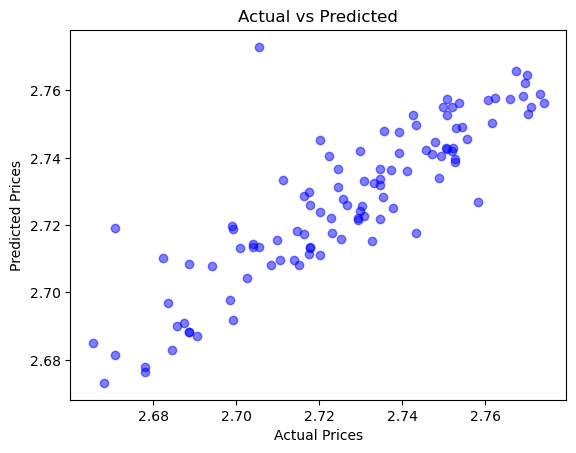

In [124]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_predict, color='blue', alpha=0.5)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted')
plt.show()

In [125]:
print("\nActual vs Predicted Prices:")
for actual, predicted in zip(y_test.values[:10], y_predict[:10]):
    print(f"Actual: {actual}, Predicted: {predicted}")


Actual vs Predicted Prices:
Actual: 2.742496610608028, Predicted: 2.752649785978838
Actual: 2.7112497982039043, Predicted: 2.7334755894714546
Actual: 2.771120900931745, Predicted: 2.7550497728516925
Actual: 2.7176859324804736, Predicted: 2.726002688441027
Actual: 2.7200843139449433, Predicted: 2.723778232231444
Actual: 2.7508580747058122, Predicted: 2.7425800596276178
Actual: 2.7303530116849455, Predicted: 2.7257175089214223
Actual: 2.6905492461699225, Predicted: 2.687203332664814
Actual: 2.6708388599759294, Predicted: 2.681587337374482
Actual: 2.7479500308654554, Predicted: 2.7446277207877747


In [126]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, x_scaled, y, cv=5, scoring='r2')
print(f"Cross-Validated R2 Score: {cv_scores.mean() * 100:.2f}%")

Cross-Validated R2 Score: -546.89%


In [127]:
print(f"Model Accuracy (R2 Score): {r2 * 100:.2f}%")

Model Accuracy (R2 Score): 76.00%


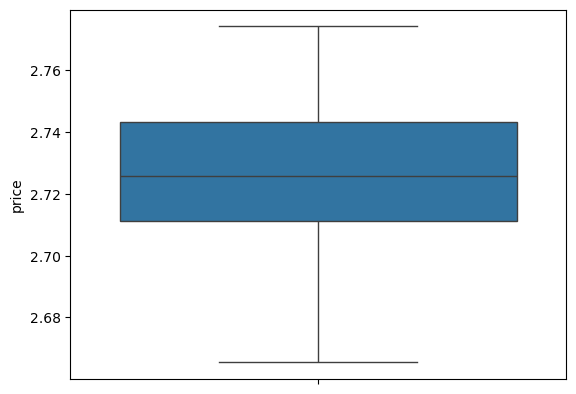

In [118]:
import seaborn as sns
sns.boxplot(df['price'])
plt.show()

In [61]:
original_price = np.exp(df['price'])
print(original_price)  

15     9100000.0
16     9100000.0
17     8960000.0
18     8890000.0
19     8855000.0
         ...    
540    1820000.0
541    1767150.0
542    1750000.0
543    1750000.0
544    1750000.0
Name: price, Length: 530, dtype: float64
